In [23]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [24]:
import sys
import numpy as np

In [25]:
from fastai import *
from fastai.vision import *
from fastai.vision.all import *
from fastai.vision.data import *
from fastai.metrics import *
from fastai.data.external import *
from fastai.data.transforms import *

import warnings
warnings.filterwarnings("ignore", category=UserWarning) 

In [26]:
# install_certifi.py
#
# sample script to install or update a set of default Root Certificates
# for the ssl module.  Uses the certificates provided by the certifi package:
#       https://pypi.python.org/pypi/certifi

import os
import os.path
import ssl
import stat
import subprocess
import sys

STAT_0o775 = ( stat.S_IRUSR | stat.S_IWUSR | stat.S_IXUSR
             | stat.S_IRGRP | stat.S_IWGRP | stat.S_IXGRP
             | stat.S_IROTH |                stat.S_IXOTH )


def main():
    openssl_dir, openssl_cafile = os.path.split(ssl.get_default_verify_paths().openssl_cafile)

    print(" -- pip install --upgrade certifi")
    subprocess.check_call([sys.executable, "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])

    import certifi

    # change working directory to the default SSL directory
    os.chdir(openssl_dir)
    relpath_to_certifi_cafile = os.path.relpath(certifi.where())
    print(" -- removing any existing file or link")
    try:
        os.remove(openssl_cafile)
    except FileNotFoundError:
        pass
    print(" -- creating symlink to certifi certificate bundle")
    os.symlink(relpath_to_certifi_cafile, openssl_cafile)
    print(" -- setting permissions")
    os.chmod(openssl_cafile, STAT_0o775)
    print(" -- update complete")

if __name__ == '__main__':
    main()

 -- pip install --upgrade certifi
 -- removing any existing file or link
 -- creating symlink to certifi certificate bundle
 -- setting permissions
 -- update complete


In [27]:
import os
import os.path
import ssl
import stat
import subprocess
import sys

STAT_0o775 = ( stat.S_IRUSR | stat.S_IWUSR | stat.S_IXUSR
             | stat.S_IRGRP | stat.S_IWGRP | stat.S_IXGRP
             | stat.S_IROTH |                stat.S_IXOTH )

openssl_dir, openssl_cafile = os.path.split(ssl.get_default_verify_paths().openssl_cafile)
subprocess.check_call([sys.executable, "-E", "-s", "-m", "pip", "install", "--upgrade", "certifi"])
import certifi
os.chdir(openssl_dir)
relpath_to_certifi_cafile = os.path.relpath(certifi.where())
try:
    os.remove(openssl_cafile)
except FileNotFoundError:
    pass
os.symlink(relpath_to_certifi_cafile, openssl_cafile)
os.chmod(openssl_cafile, STAT_0o775)


In [28]:
path = untar_data(URLs.DOGS); path

Path('/Users/aidagomezbuenoberezo/.fastai/data/dogscats')

In [29]:
path.ls()

(#5) [Path('/Users/aidagomezbuenoberezo/.fastai/data/dogscats/valid'),Path('/Users/aidagomezbuenoberezo/.fastai/data/dogscats/test1'),Path('/Users/aidagomezbuenoberezo/.fastai/data/dogscats/models'),Path('/Users/aidagomezbuenoberezo/.fastai/data/dogscats/sample'),Path('/Users/aidagomezbuenoberezo/.fastai/data/dogscats/train')]

In [30]:
batch_size=64

In [31]:
files = get_image_files(path/"train")

In [32]:
len(files)

23000

In [33]:
files[0].name

'dog.8011.jpg'

In [34]:
np.random.seed(2)
#pat=r'^(.*)_\d+.jpg'
pat=r'(\w*\d*.*\w*\d*)+.jpg'

In [35]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(700), batch_size=batch_size, num_workers=0)

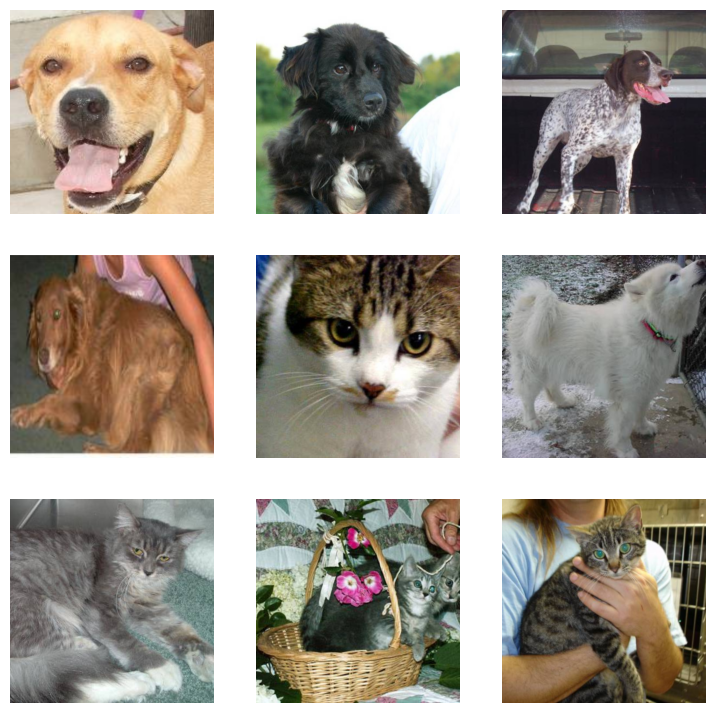

In [36]:
dls.show_batch()

In [37]:
dls = ImageDataLoaders.from_name_re(path, files, pat, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224), num_workers=0)

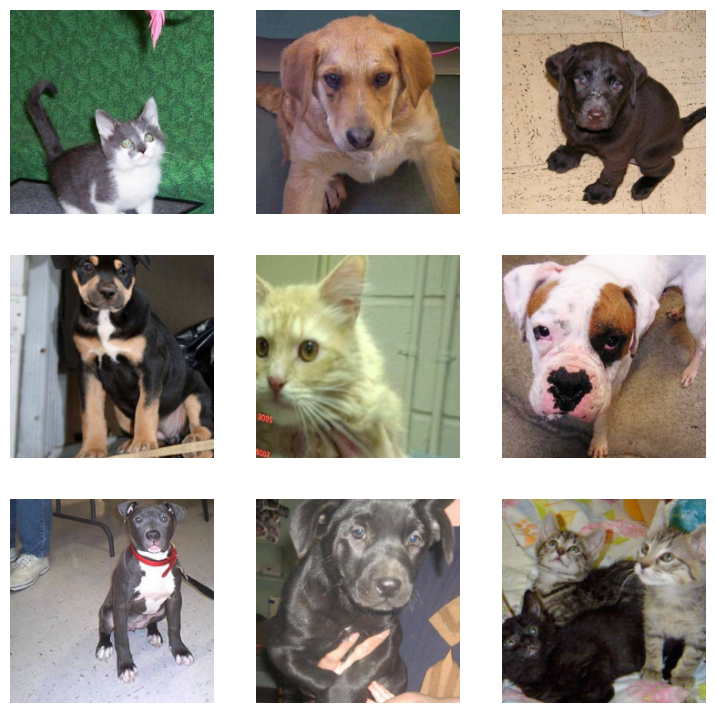

In [38]:
dls.show_batch()

In [39]:
learn = vision_learner(dls, resnet34, loss_func=CrossEntropyLossFlat(), metrics=error_rate)

SuggestedLRs(valley=6.309573450380412e-07)

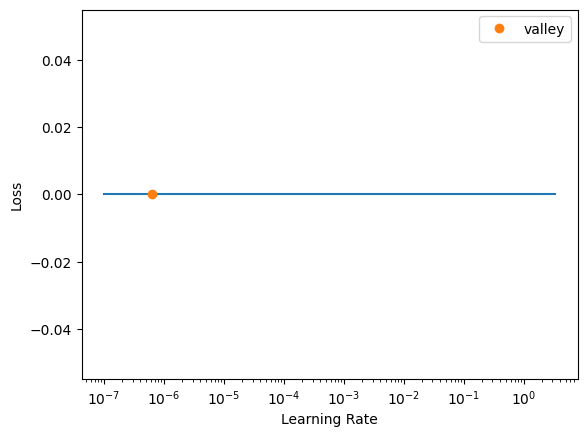

In [40]:
learn.lr_find()

In [41]:
learn.fine_tune(4, 3e-3)

epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,24:34


epoch,train_loss,valid_loss,error_rate,time
0,0.000000,0.000000,0.000000,33:05
1,0.000000,0.000000,0.000000,34:42
2,0.000000,0.000000,0.000000,38:53
3,0.000000,0.000000,0.000000,33:55


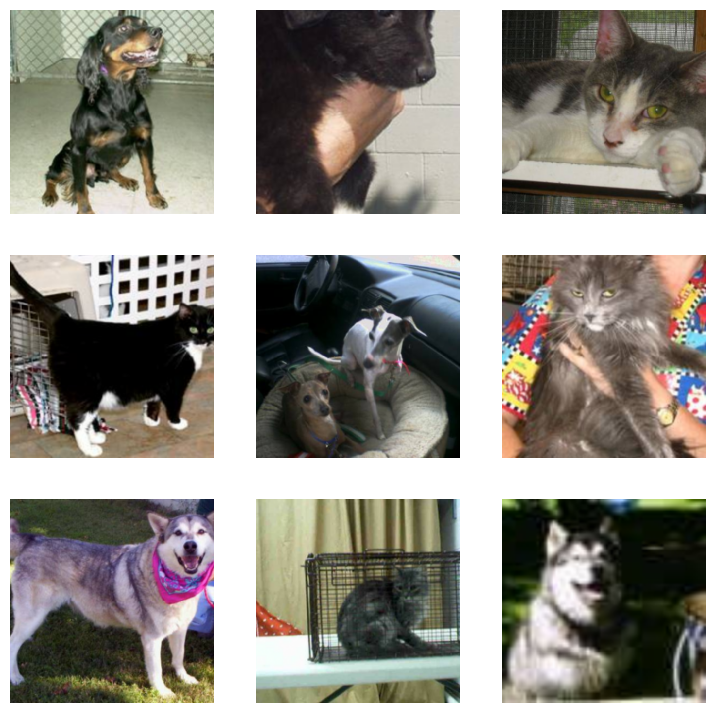

In [42]:
learn.show_results()

In [43]:
interp = Interpretation.from_learner(learn)

In [44]:
interp.plot_top_losses_lossestop_losses(9, figsize=(15, 10))

AttributeError: 'Interpretation' object has no attribute 'plot_top_losses_lossestop_losses'

In [ ]:
learn.model

In [ ]:
learn.fit_one_cyclecle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
interp=ClassificationInterpretation.from_learner(learn)
losses, idxs = interp.top_losses()
len(dls.valid_ds)==len(losses)==len(idxs)

In [ ]:
interp.plot_top_losses(9, figsize=(15, 11))

In [ ]:
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

In [ ]:
interp.most_confused(min_val=2)